<a href="https://colab.research.google.com/github/Lokesh-006/Cognifyz-/blob/main/Task_4_Geographical_Analysis_of_The_Restaurants_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geographical Analysis of The Restaurants**

**Objective:** Perform a geographical analysis of the
restaurants in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Lets load the Restaurant Data

data = pd.read_csv('/content/sample_data/Dataset .csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<Axes: xlabel='City'>

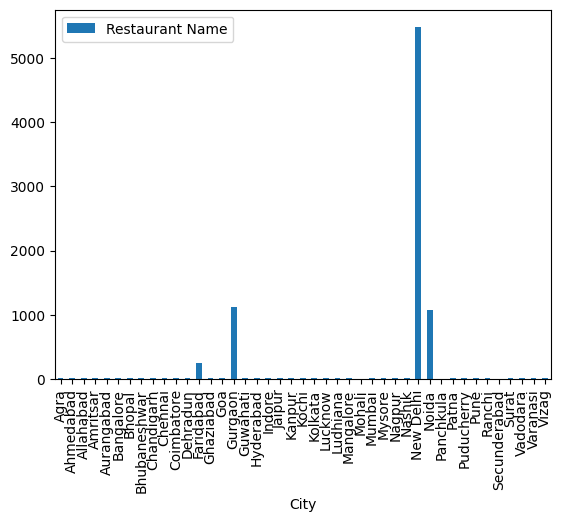

In [4]:
data[data['Country Code']==1].groupby('City').agg({'Restaurant Name':'count'}).plot(kind='bar')

In [5]:
data.groupby(['Country Code','City','Locality','Restaurant Name']).agg({'Restaurant Name':'count'})

Restaurant Name
Country Code City           Locality       Restaurant Name                                          
1            Agra           Agra Cantt     Jahanpanah                                              1
                                           Rangrezz Restaurant                                     1
                                           Time2Eat - Mama Chicken                                 1
                            Civil Lines    Chokho Jeeman Marwari Jain Bhojanalya                   1
                                           Pinch Of Spice                                          1
...                                                                                              ...
216          Waterloo       Waterloo       The Screaming Eagle                                     1
                                           The Thai Bowl                                           1
                                           Tokyo Japanese Steak House                              1
             Weirton        Weirton        Theo Yianni's Authentic Greek Restaurant                1
             Winchester Bay Winchester Bay Fishpatrick's Crabby Cafe                               1

[9458 rows x 1 columns]

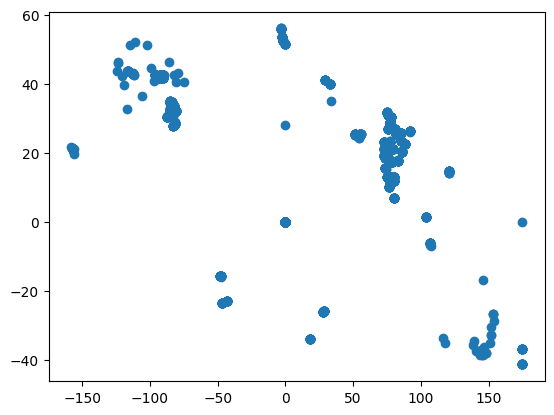

In [6]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.show()

In [7]:
fig=px.histogram(data, x='Rating color',text_auto='Rating text',color='Rating color')
fig.show()

In [8]:
# prompt: write group by  statement for city vise

data.groupby(['City','Locality']).head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [9]:
df=data


# Create a scatter plot on a geographical map of the world
fig = px.scatter_geo(df, lon='Longitude', lat='Latitude',
                     projection='natural earth',
                     title='Geographical Map with Longitude and Latitude Data',
                     labels=df['Restaurant Name'])
fig.show()

In [10]:
df=data
# Create a scatter plot on a geographical map of the world
fig = px.scatter_geo(df, lon='Longitude', lat='Latitude',
                     projection='natural earth',
                     title='Geographical Map with Longitude and Latitude Data',
                     labels=df['Restaurant Name'],
                     color=df['Country Code'],
                     )
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="rgb(243, 243, 243)",
        subunitcolor="rgb(217, 217, 217)",
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        showcountries=True,
        countrycolor="rgb(217, 217, 217)",
    )
)
fig.show()


# City-wise restaurants Average Rating, Price range, no of Cuisines verities

In [11]:
data.groupby(['City']).agg({'Aggregate rating':'mean',
                            'Price range':'mean',
                            'Cuisines':'count'}).rename(columns={'Aggregate rating':'Average Rating',
                                                                 'Price range':'average price range',
                                                                 'Cuisines': 'Number of Cuisines'})

,Average Rating,average price range,Number of Cuisines
City,,,
Abu Dhabi,4.300000,3.300000,20
Agra,3.965000,2.650000,20
Ahmedabad,4.161905,2.571429,21
Albany,3.555000,1.700000,17
Allahabad,3.395000,2.650000,20
...,...,...,...
Weirton,3.900000,2.000000,1
Wellington City,4.250000,3.250000,20
Winchester Bay,3.200000,2.000000,1


# Locality-wise restaurants Average Rating, Price range, no of Cuisines verities

In [12]:
data.groupby(['Locality']).agg({'Aggregate rating':'mean',
                            'Price range':'mean',
                            'Cuisines':'count'}).rename(columns={'Aggregate rating':'Average Rating',
                                                                 'Price range':'average price range',
                                                                 'Cuisines': 'Number of Cuisines'})

,Average Rating,average price range,Number of Cuisines
Locality,,,
"ILD Trade Centre Mall, Sohna Road",3.050000,1.500000,2
"12th Square Building, Banjara Hills",4.300000,3.000000,1
"A Hotel, Gurdev Nagar",3.600000,2.000000,1
"ARSS Mall, Paschim Vihar",3.100000,2.000000,1
Aaya Nagar,0.000000,2.000000,1
...,...,...,...
"ibis New Delhi, Aerocity",1.550000,2.000000,2
�ayyolu,4.300000,2.000000,1
�guas Claras,3.666667,3.666667,3


In [13]:
# group by  statement for city vise
data.groupby(['City','Locality']).agg({'Votes': 'mean', 'Rating text': 'count'}).rename(columns={'Votes': 'Average Votes', 'Rating text': 'Number of Ratings'})

Average Votes  \
City      Locality                                                         
Abu Dhabi Abu Dhabi Mall, Tourist Club Area  (Al Zahiyah)          291.5   
          Al Dhafrah                                               347.5   
          Al Mushrif                                               228.0   
          Al Wahda Mall, Al Wahda                                  251.5   
          Crowne Plaza Abu Dhabi, Al Markaziya                     246.0   
...                                                                  ...   
��stanbul Kad۱k�_y Merkez                                          506.0   
          Karak�_y                                                 931.0   
          Ko��uyolu                                               1034.0   
          Kuru�_e��me                                              781.0   
          Moda                                                     591.0   

                                                           Number of Ratings  
City      Locality                                                            
Abu Dhabi Abu Dhabi Mall, Tourist Club Area  (Al Zahiyah)                  2  
          Al Dhafrah                                                       2  
          Al Mushrif                                                       1  
          Al Wahda Mall, Al Wahda                                          2  
          Crowne Plaza Abu Dhabi, Al Markaziya                             1  
...                                                                      ...  
��stanbul Kad۱k�_y Merkez                                                  1  
          Karak�_y                                                         4  
          Ko��uyolu                                                        1  
          Kuru�_e��me                                                      2  
          Moda                                                             1  

[1265 rows x 2 columns]

# words Analysis using wordcloud.

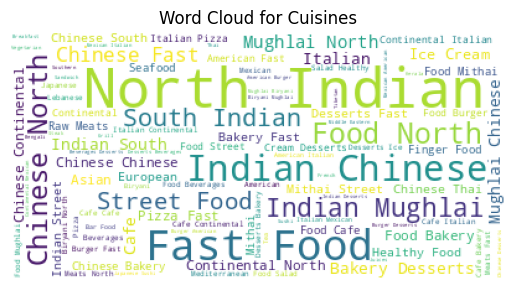

In [14]:
cuisines = data['Cuisines'].str.cat(sep=',')
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS).generate(cuisines)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Cuisines')
plt.show()


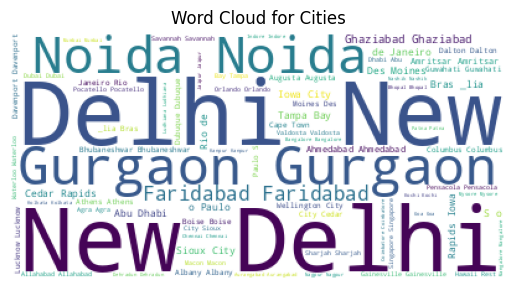

In [15]:
# Create a word cloud for cities
cities = data['City'].str.cat(sep=',')
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS).generate(cities)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Cities')
plt.show()



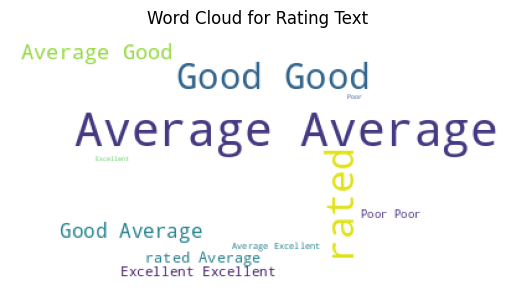

In [16]:
# Create a word cloud for rating text
rating_text = data['Rating text'].str.cat(sep=',')
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS).generate(rating_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Rating Text')
plt.show()



# Conclusion:

The geographical analysis of the restaurants in the dataset reveals several interesting insights:

* The restaurants are distributed across various cities and localities, with a higher concentration in certain areas.
* The average rating, price range, and number of cuisines vary by city and locality, indicating differences in the restaurant offerings and customer preferences.
* The word cloud analysis highlights the most common cuisines, cities, and rating text associated with the restaurants.


These findings can be used by various stakeholders, such as restaurant owners, food delivery services, and city planners, to make informed decisions about restaurant location, menu planning, and marketing strategies. For example, restaurants in areas with a high concentration of similar cuisines may consider diversifying their offerings to attract a wider customer base. Additionally, food delivery services can optimize their operations by understanding the distribution of restaurants and customer preferences in different localities. City planners can leverage this information to develop strategies for promoting local cuisine and tourism.